In [1]:
import qiskit
from qiskit import *
# import matplotlib.pyplot as plt
%matplotlib inline
print(qiskit.__version__)

0.18.3


In [2]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
# circuit.measure_all()
circuit.barrier()
# circuit.draw(output='mpl')

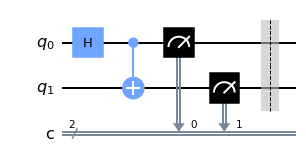

In [3]:
circuit.draw(output='mpl')

# Local System

In [4]:
simulator = Aer.get_backend('aer_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
count = result.get_counts()
print(count)

{'11': 514, '00': 510}


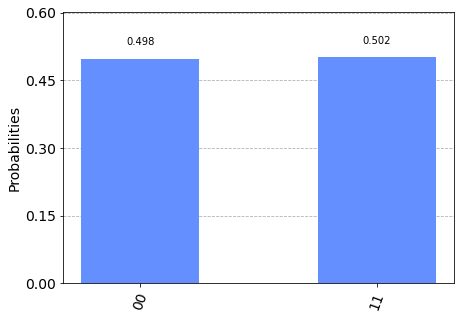

In [5]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(count)

# IBMQ

In [6]:
from qiskit import IBMQ
IBMQ.save_account("b32678329f7f6dd426b8cf18f20bea23c2cd056b0bee2b4bcf49744b612e598f20f7170a8da4bfd99b009b6fa59d596edea7a6926fd388be158843d8ef******", overwrite=True)

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [8]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [9]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [10]:
job = execute(circuit, backend=backend, shots=1024)

In [11]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [12]:
result = job.result()
count = result.get_counts()
print(count)

{'00': 517, '01': 22, '10': 34, '11': 451}


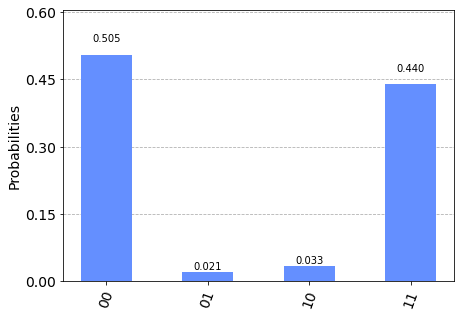

In [13]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(count)